In [1]:
import pandas as pd

trip_data_file = "data/trip_data_4.csv"
trip_fare_file = "data/trip_fare_4.csv"

trips = pd.read_csv(trip_data_file, nrows=50000)
fares = pd.read_csv(trip_fare_file, nrows=50000)

In [2]:
full_tripdata = pd.merge(left=trips,right=fares, how='left', left_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'], right_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'])
full_tripdata = full_tripdata.drop_duplicates()

In [3]:
full_tripdata.columns

Index([u'medallion', u' hack_license', u' vendor_id', u' rate_code',
       u' store_and_fwd_flag', u' pickup_datetime', u' dropoff_datetime',
       u' passenger_count', u' trip_time_in_secs', u' trip_distance',
       u' pickup_longitude', u' pickup_latitude', u' dropoff_longitude',
       u' dropoff_latitude', u' payment_type', u' fare_amount', u' surcharge',
       u' mta_tax', u' tip_amount', u' tolls_amount', u' total_amount'],
      dtype='object')

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [8]:
full_tripdata[[" fare_amount"]].describe()

,fare_amount
count,50000.000000
mean,12.522339
std,9.755557
min,2.500000
25%,6.500000
50%,9.500000
75%,15.000000
max,350.000000


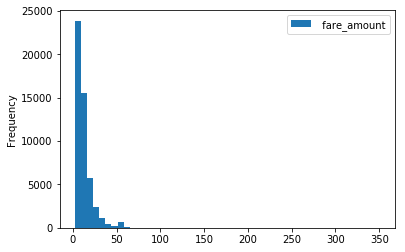

In [14]:
full_tripdata[[" fare_amount"]].plot.hist(bins=50)

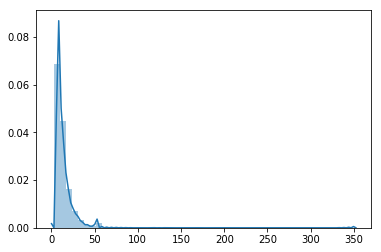

In [12]:
sns.distplot(full_tripdata[[" fare_amount"]])

In [15]:
full_tripdata = full_tripdata.drop(columns=['medallion',' hack_license',' vendor_id',' rate_code',' store_and_fwd_flag',' payment_type'])

In [16]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' fare_amount', u' surcharge', u' mta_tax', u' tip_amount',
       u' tolls_amount', u' total_amount'],
      dtype='object')

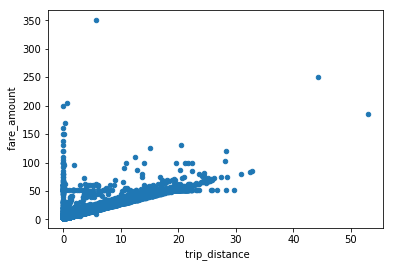

In [18]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount')

In [27]:
#check data whose trip distance is 0 

zero_distance = full_tripdata.loc[(full_tripdata[' trip_distance'] == 0)]

zero_distance.describe()

,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,265.000000,265.000000,265.0,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,1.637736,62.818868,0.0,-28.471470,15.681316,-20.652789,11.377632,30.662868,0.135849,0.341509,4.311057,0.751094,36.202377
std,1.211096,326.485761,0.0,36.059938,19.860852,33.242449,18.313628,32.183460,0.250828,0.233090,6.776104,2.510965,35.702585
min,1.000000,0.000000,0.0,-74.095093,0.000000,-74.048233,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,1.000000,0.000000,0.0,-73.977303,0.000000,-73.809486,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000,8.500000
50%,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.500000,1.000000,0.000000,21.600000
75%,2.000000,0.000000,0.0,0.000000,40.730572,0.000000,40.674305,52.000000,0.000000,0.500000,7.000000,0.000000,60.500000
max,6.000000,3600.000000,0.0,0.000000,41.026131,0.000000,41.026146,199.000000,1.000000,0.500000,50.000000,17.000000,219.330000


In [54]:
columnName = ' trip_distance'
print full_tripdata[columnName].describe()

full_tripdata.astype(bool).sum(axis=0)

count    49039.000000
mean         3.150270
std          3.210309
min          0.010000
25%          1.180000
50%          2.080000
75%          3.860000
max         52.920000
Name:  trip_distance, dtype: float64


 pickup_datetime      49039
 dropoff_datetime     49039
 passenger_count      49039
 trip_time_in_secs    49039
 trip_distance        49039
 pickup_longitude     49039
 pickup_latitude      49039
 dropoff_longitude    49035
 dropoff_latitude     49039
 fare_amount          49039
 surcharge            47342
 mta_tax              48971
 tip_amount           26034
 tolls_amount          1518
 total_amount         49039
dtype: int64

# Remove trips whose trip_time, trip_distance, coordinates is 0

In [53]:
full_tripdata = full_tripdata.loc[(full_tripdata[' pickup_longitude'] != 0) & (full_tripdata[' pickup_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0)]

full_tripdata = full_tripdata.loc[(full_tripdata[' trip_distance'] != 0) & (full_tripdata[' trip_time_in_secs'] != 0)]

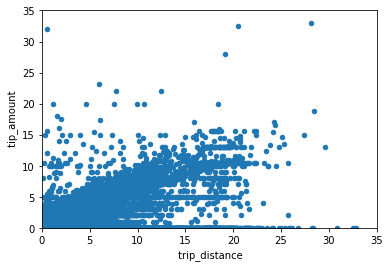

In [57]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' tip_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' tip_amount',ylim=(0,35),xlim=(0,35))

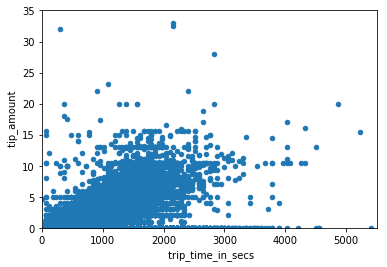

In [59]:
columnName = ' trip_time_in_secs'

data = pd.concat([full_tripdata[' tip_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' tip_amount',ylim=(0,35),xlim=(0,5500))

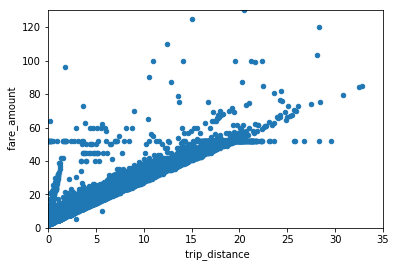

In [61]:
columnName = ' trip_distance'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount',ylim=(0,130),xlim=(0,35))

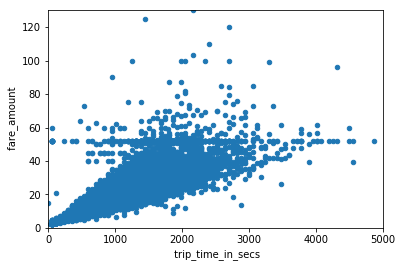

In [63]:
columnName = ' trip_time_in_secs'

data = pd.concat([full_tripdata[' fare_amount'], full_tripdata[columnName]],axis=1)

data.plot.scatter(x=columnName,y=' fare_amount',ylim=(0,130),xlim=(0,5000))

In [64]:
full_tripdata.columns

Index([u' pickup_datetime', u' dropoff_datetime', u' passenger_count',
       u' trip_time_in_secs', u' trip_distance', u' pickup_longitude',
       u' pickup_latitude', u' dropoff_longitude', u' dropoff_latitude',
       u' fare_amount', u' surcharge', u' mta_tax', u' tip_amount',
       u' tolls_amount', u' total_amount'],
      dtype='object')

# Relationship with categorical features

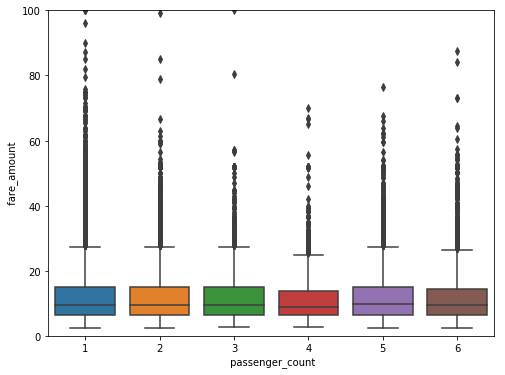

In [67]:

columnName = ' passenger_count'
data = pd.concat([full_tripdata[columnName], full_tripdata[' fare_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" fare_amount", data=data)
fig.axis(ymin=0, ymax=100);

# Conclusion , passenger_count has no correlation with fare_amount

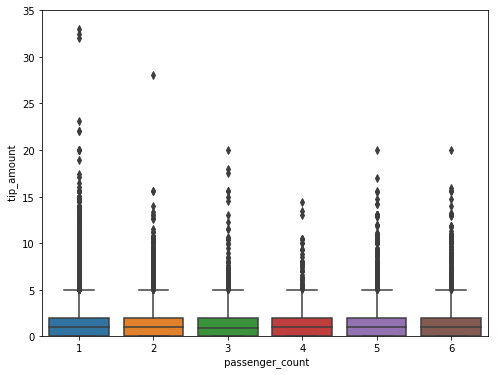

In [70]:
columnName = ' passenger_count'
data = pd.concat([full_tripdata[columnName], full_tripdata[' tip_amount']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=columnName, y=" tip_amount", data=data)
fig.axis(ymin=0, ymax=35);

# Conclusion , passenger_count has no correlation with tip_amount